# Compare norms

In [1]:
import sys; sys.path.append('../..')
from abslithist import *
from abslithist.words import *

## Changes

In [414]:
cols=[
    col for col in dfnorms.columns
    if 'PAV-Conc' in col
    and not 'orig' in col
]
dfnorms_pav = dfnorms[cols].dropna()

In [415]:
dfnorms_pav2=dfnorms_pav.reset_index().melt('word')
dfnorms_pav2[dfnorms_pav2.word.isin({'culture'})]

,word,variable,value
3481,culture,Abs-Conc.PAV-Conc.C16,1.779822
19849,culture,Abs-Conc.PAV-Conc.C17,-0.088424
36217,culture,Abs-Conc.PAV-Conc.C18,-0.163357
52585,culture,Abs-Conc.PAV-Conc.C19,-1.025956
68953,culture,Abs-Conc.PAV-Conc.C20,-1.291762
85321,culture,Abs-Conc.PAV-Conc.median,-0.163357


In [445]:
mfwchanges = C.mfw_df(
    n=None,
    only_pos={'n*','j*'},
    keep_periods=False,
    excl_stopwords=True,
#     yearbin=100
).query('fpm>1')
mfwchanges

,count,fpm,rank,ranks_avg,pos,pos0
word,,,,,,
time,306954,1334.389378,1,84,nn1,n
little,284166,1235.325462,2,88,jj,j
day,181595,789.429162,3,135,nn1,n
eyes,169756,737.962702,4,143,nn2,n
life,164895,716.830979,5,149,nn1,n
...,...,...,...,...,...,...
insubordination,231,1.004202,13410,25077,nn1,n
rebukes,231,1.004202,13411,25086,nn2,n
antiquarian,231,1.004202,13412,25060,nn1,n


In [472]:
fld='MT-Conc'#'PAV-Conc'
startcols=[
    f'Abs-Conc.{fld}.C16',
    f'Abs-Conc.{fld}.C17',
    f'Abs-Conc.{fld}.C18'
]
endcols=[
    f'Abs-Conc.{fld}.C19',
    f'Abs-Conc.{fld}.C20'
]

# make changes
changedata=dfnorms[startcols + endcols]
changedata['start']=dfnorms[startcols].median(axis=1)
changedata['end']=dfnorms[endcols].mean(axis=1)
changedata["change"] = changedata['end']-changedata['start']
changedata=changedata.join(mfwchanges).dropna().sort_values('change')
changedata

,Abs-Conc.MT-Conc.C16,Abs-Conc.MT-Conc.C17,Abs-Conc.MT-Conc.C18,Abs-Conc.MT-Conc.C19,Abs-Conc.MT-Conc.C20,start,end,change,count,fpm,rank,ranks_avg,pos,pos0
word,,,,,,,,,,,,,,
partisan,1.448010,1.264195,-0.972051,-1.264498,-1.763714,1.264195,-1.514106,-2.778301,986.0,4.286336,5943.0,10343.0,jj,j
recipient,1.778765,0.403759,1.297736,-1.327057,-1.100274,1.297736,-1.213665,-2.511401,270.0,1.173743,12437.0,22987.0,nn1,n
bigness,1.623126,1.608898,1.760426,0.308522,-1.407570,1.623126,-0.549524,-2.172651,330.0,1.434575,11274.0,20487.0,nn1,n
sanguine,0.574938,0.462813,-0.750371,-1.392576,-1.974389,0.462813,-1.683482,-2.146295,1444.0,6.277352,4573.0,7979.0,jj,j
innermost,1.034890,1.524284,1.444531,-0.539877,-0.800372,1.444531,-0.670124,-2.114655,382.0,1.660629,10458.0,18844.0,jj,j
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
jars,-0.590920,-0.331069,1.158274,1.451681,1.739822,-0.331069,1.595751,1.926820,837.0,3.638604,6621.0,11564.0,nn2,n
railing,-0.787268,-0.771167,-0.638286,0.924965,1.434470,-0.771167,1.179718,1.950885,1340.0,5.825243,4819.0,8406.0,nn1,n
clearing,-1.414314,-1.019223,-0.410589,1.034003,0.974511,-1.019223,1.004257,2.023480,2801.0,12.176498,2726.0,4859.0,nn1,n


In [473]:
# Top 100 most abstractifying nouns
pd.options.display.max_rows=100
print(', '.join(changedata.head(100).index))

partisan, recipient, bigness, sanguine, innermost, hobby, broader, boor, blacks, galling, flagrant, loftier, boss, outright, budget, whites, satire, vagaries, tithe, views, sallow, ruthless, standards, bugle, staunch, hazel, jaded, bespoke, qualms, sane, barriers, rampant, uppermost, lack, broad, fraught, goldsmith, bloodless, pedant, status, dears, inmost, factor, fair, dates, obtuse, breadth, mania, laureate, farce, slough, tissue, races, board, shrug, aloof, brooding, thrift, tragic, gripe, knell, negroes, artless, seer, probe, hoar, gauge, draft, blithe, knightly, mettle, uprising, glib, palfrey, epigram, paltry, negro, focus, bored, chilling, housing, aspiration, prospective, ode, untried, phlegmatic, ardor, imagery, warren, puppet, annoying, element, primrose, pioneers, pained, continuity, scruple, blanched, middle, tile


In [474]:
# Top 100 most concretizing nouns
pd.options.display.max_rows=100
print(', '.join(changedata.dropna().sort_values('change',ascending=False).head(100).index))

railings, breakers, clearing, railing, jars, breaker, jam, cafe, blinding, mat, magnifying, blinds, enormous, performers, sighted, illumination, visor, corporal, regulars, secluded, ghostly, delegation, drifts, talon, reservation, publishers, illustration, reporter, puddle, reproving, polishing, rail, supper, jus, blocks, comforter, packets, cap, incredulous, patterns, valve, heap, neighbor, concourse, gala, jar, station, suitable, sled, delectable, frame, communications, racks, comfortable, deer, nearest, terminus, damn, attic, stained, darkening, imprecations, seals, pet, tit, bountiful, spotless, checking, interior, bale, deposition, puff, uniform, ghost, introductions, establishment, delegate, diver, loose, thanksgiving, mirrors, advices, stagger, exterior, permission, brothers, omnibus, jest, handy, reporters, rack, motions, fountain, coke, economical, offices, damp, intruders, suits, dive


In [475]:
# Most abstract most abstractifying nouns
changedata.loc[['carriage','culture']]

,Abs-Conc.MT-Conc.C16,Abs-Conc.MT-Conc.C17,Abs-Conc.MT-Conc.C18,Abs-Conc.MT-Conc.C19,Abs-Conc.MT-Conc.C20,start,end,change,count,fpm,rank,ranks_avg,pos,pos0
word,,,,,,,,,,,,,,
carriage,0.780706,-0.830712,0.553325,1.039245,1.013975,0.553325,1.026610,0.473285,15346.0,66.712079,451.0,1090.0,nn1,n
culture,1.448741,-0.104510,-0.084992,-0.907460,-1.286993,-0.084992,-1.097226,-1.012235,1833.0,7.968411,3821.0,6680.0,nn1,n


In [476]:
# Ranked by most abstractifying to least
changedata.index.get_loc('culture'), len(changedata)

(191, 8475)

In [477]:
# Most abstractifying
changedata.sort_values('change',ascending=True).head(50)

,Abs-Conc.MT-Conc.C16,Abs-Conc.MT-Conc.C17,Abs-Conc.MT-Conc.C18,Abs-Conc.MT-Conc.C19,Abs-Conc.MT-Conc.C20,start,end,change,count,fpm,rank,ranks_avg,pos,pos0
word,,,,,,,,,,,,,,
partisan,1.448010,1.264195,-0.972051,-1.264498,-1.763714,1.264195,-1.514106,-2.778301,986.0,4.286336,5943.0,10343.0,jj,j
recipient,1.778765,0.403759,1.297736,-1.327057,-1.100274,1.297736,-1.213665,-2.511401,270.0,1.173743,12437.0,22987.0,nn1,n
bigness,1.623126,1.608898,1.760426,0.308522,-1.407570,1.623126,-0.549524,-2.172651,330.0,1.434575,11274.0,20487.0,nn1,n
sanguine,0.574938,0.462813,-0.750371,-1.392576,-1.974389,0.462813,-1.683482,-2.146295,1444.0,6.277352,4573.0,7979.0,jj,j
innermost,1.034890,1.524284,1.444531,-0.539877,-0.800372,1.444531,-0.670124,-2.114655,382.0,1.660629,10458.0,18844.0,jj,j
hobby,1.984965,2.018294,1.255741,-0.366280,0.127710,1.984965,-0.119285,-2.104250,472.0,2.051877,9341.0,16622.0,nn1,n
broader,1.515030,1.264674,1.139480,-0.488878,-1.187852,1.264674,-0.838365,-2.103039,643.0,2.795247,7806.0,13700.0,jjr,j
boor,2.240336,1.540120,1.385095,0.193030,-1.090283,1.540120,-0.448626,-1.988746,237.0,1.030286,13244.0,24747.0,nn1,n
blacks,1.971085,1.449572,0.555417,-0.455956,-0.621632,1.449572,-0.538794,-1.988366,1362.0,5.920882,4765.0,8313.0,nn2,n


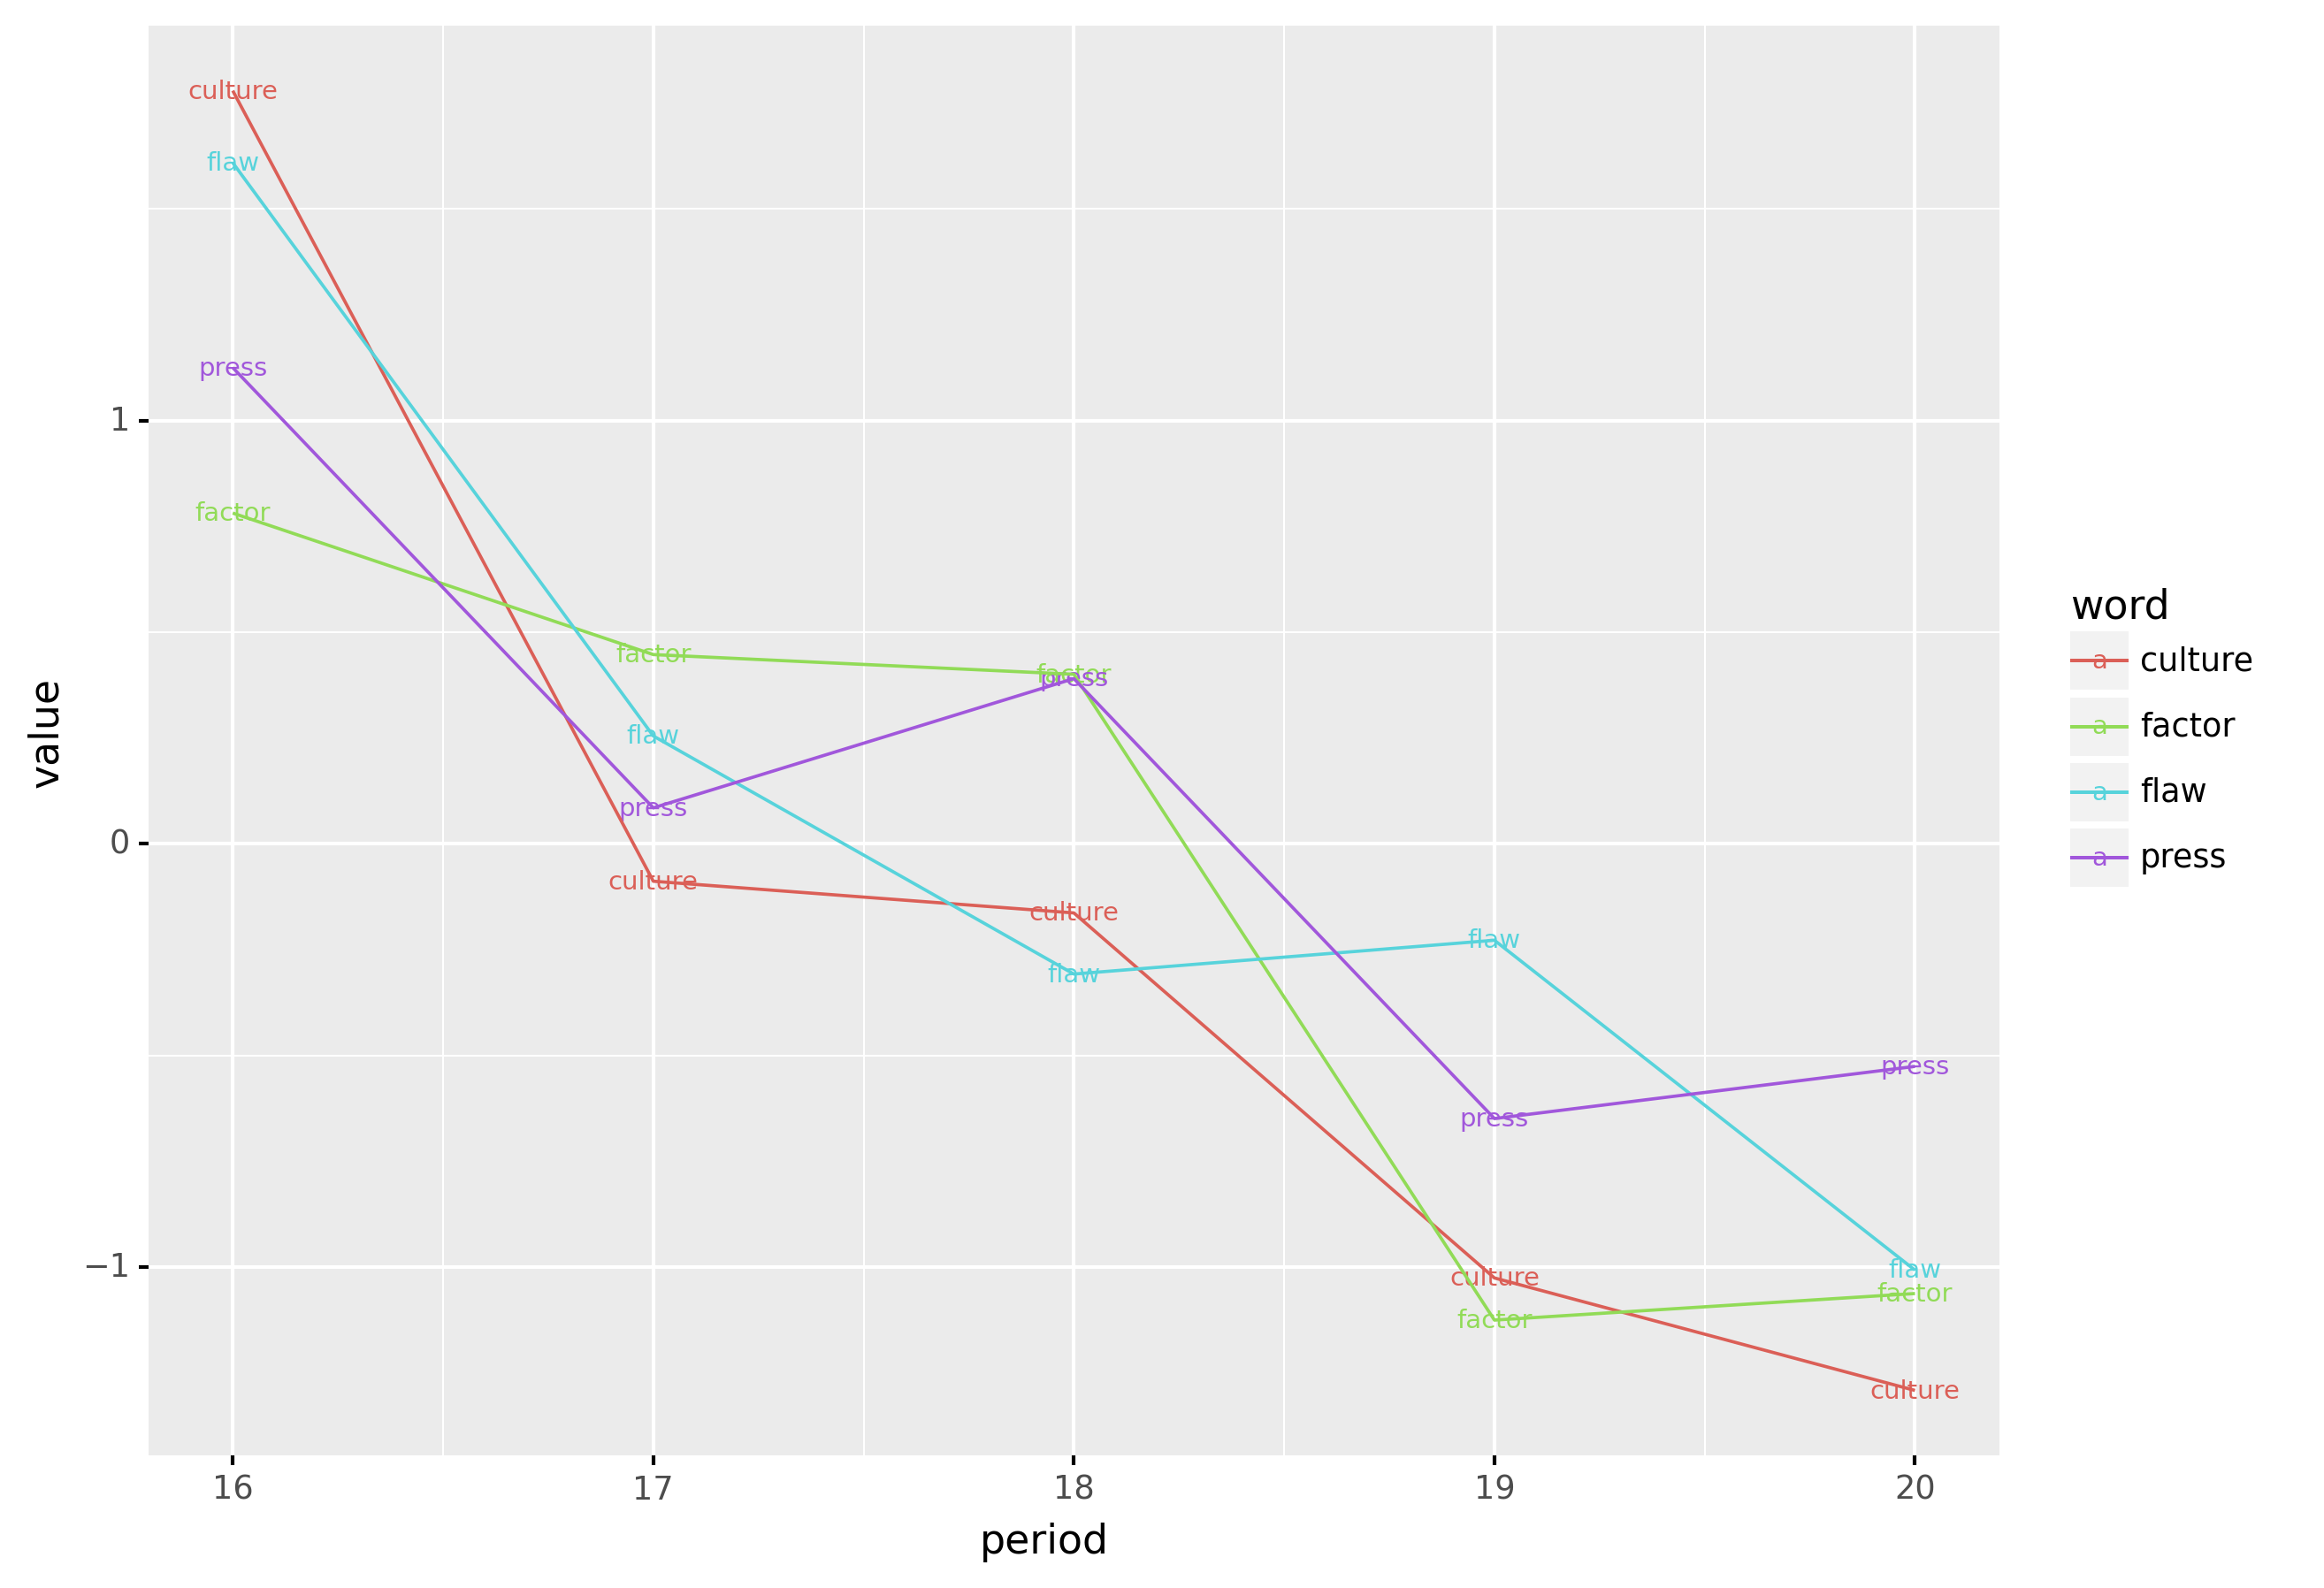

<ggplot: (8771550644889)>

In [246]:
# p9.ggplot(
#     p9.aes(
#         x='period',
#         y='value',
#         label='word',
#         group='word',
#         color='word'
#     ),
#     data=df[df.word.isin({'culture'} | set(df.word.sample(n=5)) )]
# ) + p9.geom_text(size=7) + p9.geom_line()